In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Yelp Bussines

In [37]:
df = pd.read_csv('Datasets optimizados/Google/all_in_one_limpio.csv.gz', compression='gzip')
df

,gmap_id,latitude,longitude,category,avg_rating,Estado_Perteneciente
0,0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,['Pharmacy'],4.9,Georgia
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,['Textile exporter'],4.5,California
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,California
3,0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,['Fabric store'],3.3,California
4,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,['Fabric store'],4.3,California
...,...,...,...,...,...,...
2996590,0x89c6c74f43a49b55:0x6be6995921c58b12,39.947254,-75.164953,['Steak house' 'Fine dining restaurant' 'Seafo...,4.6,New Jersey
2996591,0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,42.788636,-76.122120,['Chevrolet dealer'],4.4,New York
2996592,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,42.603831,-76.165286,['Veterinarian'],4.3,New York
2996593,0x88d9e872a9e39f3d:0x5de29f50507e5d73,25.491641,-80.456076,['Animal feed store'],4.9,Florida


In [38]:
df = df[df['category'].str.contains('Restaurant')]

C:\Users\Damian\AppData\Local\Temp\ipykernel_12132\2721569911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')


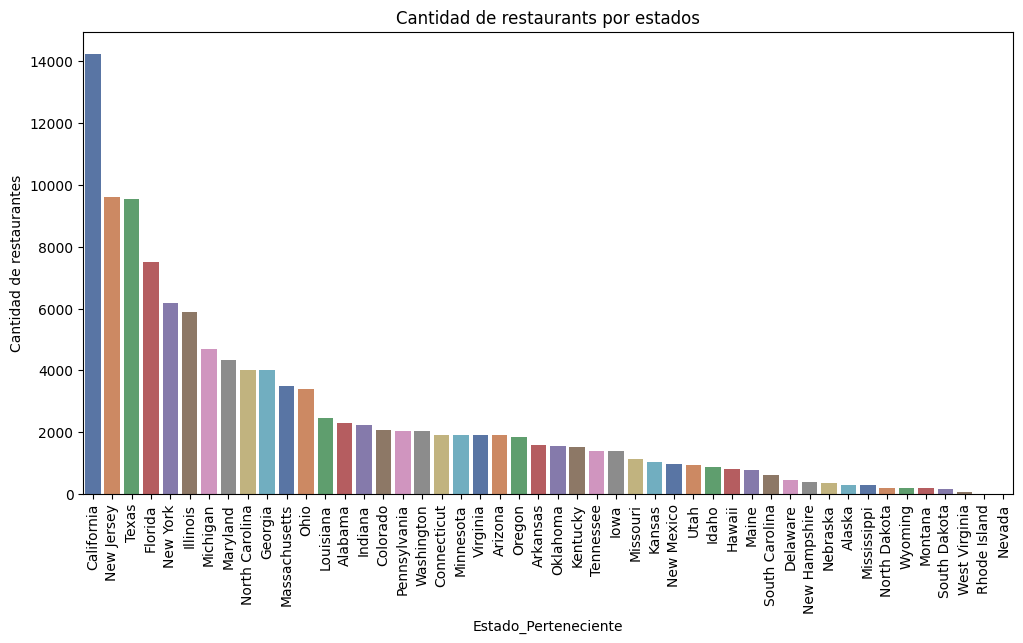

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')
plt.xticks(rotation= 90)
plt.ylabel('Cantidad de restaurantes')
plt.title('Cantidad de restaurants por estados')
plt.show()

## Google Business

In [40]:
df = pd.read_csv('Datasets optimizados/Yelp/business.csv.gz', compression='gzip')

In [41]:
df[df['categories'].str.contains('Restaurant')]

,business_id,latitude,longitude,stars,categories,Estado_Perteneciente
3,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",New Jersey
5,CF33F8-E6oudUQ46HnavjQ,36.269593,-87.058943,2.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Tennessee
8,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,"Pubs, Restaurants, Italian, Bars, American (Tr...",Illinois
9,bBDDEgkFA1Otx9Lfe7BZUQ,36.208102,-86.768170,1.5,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Tennessee
11,eEOYSgkmpB90uNA7lDOMRA,27.955269,-82.456320,4.0,"Vietnamese, Food, Restaurants, Food Trucks",Florida
...,...,...,...,...,...,...
144651,w_4xUt-1AyY2ZwKtnjW0Xg,43.616590,-116.202383,4.5,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",Idaho
144653,l9eLGG9ZKpLJzboZq-9LRQ,39.925656,-75.310344,3.0,"Restaurants, Sandwiches, Convenience Stores, C...",New Jersey
144655,cM6V90ExQD6KMSU3rRB5ZA,43.615401,-116.284689,4.0,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",Idaho
144663,WnT9NIzQgLlILjPT0kEcsQ,39.935982,-75.158665,4.5,"Restaurants, Mexican",New Jersey


C:\Users\Damian\AppData\Local\Temp\ipykernel_12132\3901146235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')


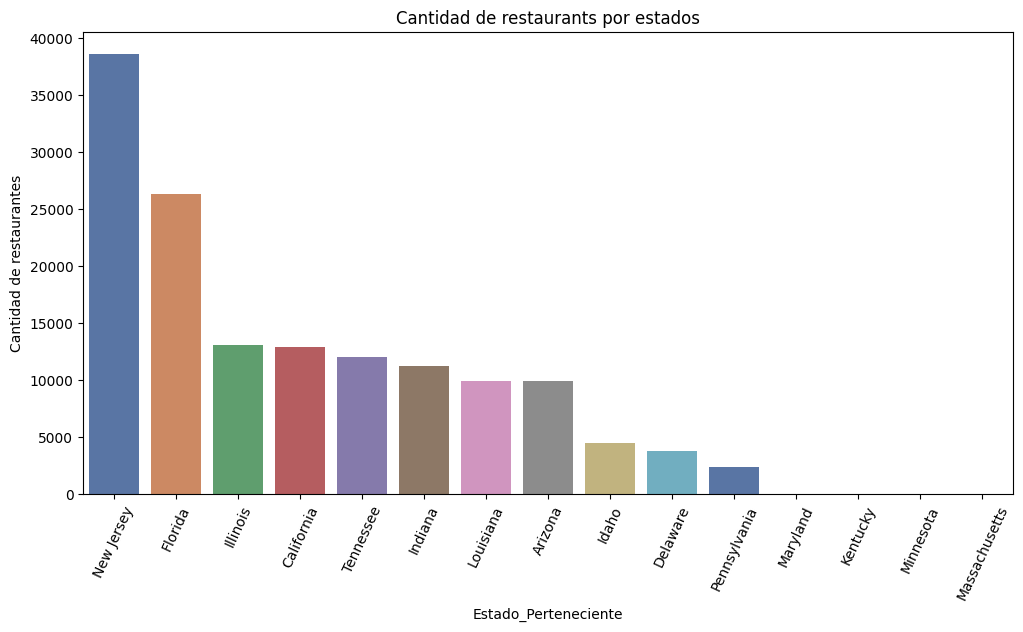

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data= df['Estado_Perteneciente'].value_counts(), palette = 'deep')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de restaurantes')
plt.title('Cantidad de restaurants por estados')
plt.show()